In [6]:
%matplotlib inline

# 로지스틱 회귀분석
 - 회귀분석에도 쓰이고 classification에도 쓰인다
 - y값이 bound(위 아래로 막혀있는 경우)되있는 경우에 쓰인다
 - 시험점수의 경우 0 ~ 100 사이의 값을 가진다. (음수가 나올 수 없다)
 - s자의 형태를  띄게 된다.
 - 잔차의 분포가 노말을 따르지 않는다.
 - x에 따라 선형적으로 기댓값이 달라지는 normal 분포 $$P(y|x) = N(W^Tx | \sigma^2)$$
$$P(y|x) = Bin(y;\theta(x), N)$$
 - N을 1로 놓으면 베르누이분포가 되고 이게 classification이 된다. (0아니면 1이 되기 때문에)
 - 

# 시그모이드 함수
 - 위 아래를 막아놓는 함수
 - 로지스틱, 오차 함수, 하이퍼볼릭 탄젠트 함수

# 로지스틱 함수
 - $$\text{odds ratio} = \dfrac{\theta}{1-\theta}$$
 - $$z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right)$$
 - $$\text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}}$$

# 로지스틱 모형의 모수 추정
 - MLE방법으로 모수 w를 추정
 - $$\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \theta(x_i;w)(1-\theta(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}$$

# StatsModels 패키지의 로지스틱 회귀

In [1]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [4]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.7679
Time:                        10:45:07   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


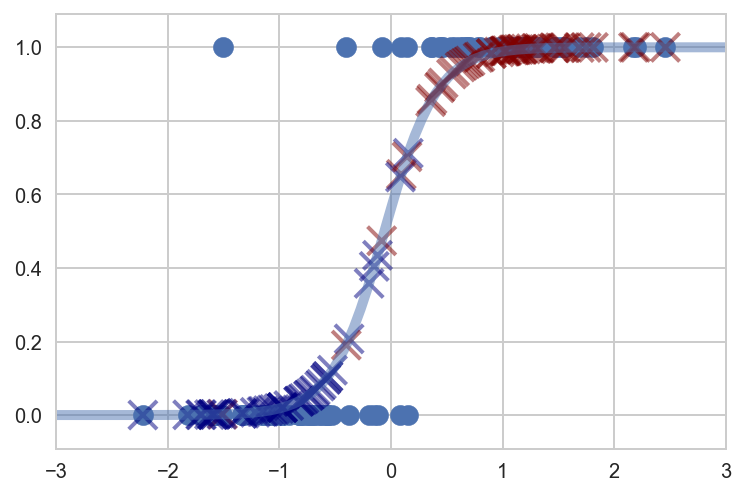

In [7]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

# Scikit-Learn 패키지의 로지스틱 회귀

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

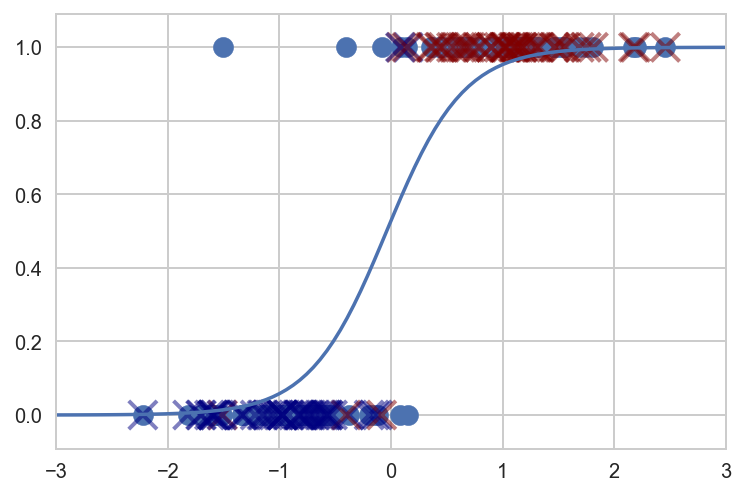

In [11]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

# 연습문제1 붓꽃

In [260]:
from sklearn.datasets import load_iris

iris = load_iris()

In [245]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [246]:
target = iris.target[50:]

In [247]:
iris = pd.DataFrame(iris.data[50:] , columns=iris.feature_names)

In [248]:
iris["Target"] = target

In [249]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
5,5.7,2.8,4.5,1.3,1
6,6.3,3.3,4.7,1.6,1
7,4.9,2.4,3.3,1.0,1
8,6.6,2.9,4.6,1.3,1
9,5.2,2.7,3.9,1.4,1


In [250]:
iris = iris.rename(columns={"sepal length (cm)":"sepal_length", "sepal width (cm)":"sepal_width",
                    "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"})



In [251]:
iris

,sepal_length,sepal_width,petal_length,petal_width,Target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
5,5.7,2.8,4.5,1.3,1
6,6.3,3.3,4.7,1.6,1
7,4.9,2.4,3.3,1.0,1
8,6.6,2.9,4.6,1.3,1
9,5.2,2.7,3.9,1.4,1


In [252]:
model = sm.Logit.from_formula("Target ~ sepal_length + sepal_width + petal_length + petal_width + 0", iris)

ValueError: endog must be in the unit interval.

# QDA와 LDA

In [270]:
idx = np.in1d(iris.data, iris.target)
X0 = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X = sm.add_constant(X0)

In [256]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [271]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [273]:
qda.means_

array([[1.   , 5.006, 3.418, 1.464, 0.244],
       [1.   , 5.936, 2.77 , 4.26 , 1.326],
       [1.   , 6.588, 2.974, 5.552, 2.026]])

In [280]:
qda.covariance_[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.12424898, 0.10029796, 0.01613878, 0.01054694],
       [0.        , 0.10029796, 0.14517959, 0.01168163, 0.01143673],
       [0.        , 0.01613878, 0.01168163, 0.03010612, 0.00569796],
       [0.        , 0.01054694, 0.01143673, 0.00569796, 0.01149388]])

In [290]:
y1 = y.reshape(-1,1)
qda.predict(y1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [293]:
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [294]:
lda.means_

array([[1.   , 5.006, 3.418, 1.464, 0.244],
       [1.   , 5.936, 2.77 , 4.26 , 1.326],
       [1.   , 6.588, 2.974, 5.552, 2.026]])

In [302]:
lda.covariance_

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.259708  , 0.09122   , 0.16409333, 0.037704  ],
       [0.        , 0.09122   , 0.11356667, 0.05413333, 0.03275467],
       [0.        , 0.16409333, 0.05413333, 0.18146667, 0.04169067],
       [0.        , 0.037704  , 0.03275467, 0.04169067, 0.04117067]])